In [1]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [475]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

# Introduction

So far we have been mostly using the following modules:

- `scipy`: for probabilties and simulations
- `numpy`: for numerical operations
- `matplotlib`: for plotting (note: partly disguised by helper functions provided for this class (e.g. `plot_line`) which abstract away use of matplotlib)

We have only recently introduced `pandas` as a new module to work with dataframes. When referring to dataframes we mean data objects similar to an **excel sheet** where we would typically have:

- header describing the column data
- each column data could be of different types (numeric, qualtiative, text etc.)
- each row is labelled

**Dataframes helpful for reserach**  
Working with dataframes is helpful in quantitative research as our data typically doesn't fully consist of numerical data and we also want to give our variables explanatory names. 

**Organization of data is important**  
Quantitative research involves many steps. The data analysis part involves e.g.: 

- generating data: e.g. via survey, web scraping, gathering from different sources etc.

- preprocessing data: i.e. preparing the data for analysis; e.g. cleaning the data, filtering data, rearranging data, combining data sets etc.

- exploring data: plotting raw data, calculating descriptive statistics etc.

- analyzing data: e.g. running a regression analysis

- presenting data: e.g. plotting data or creating summary tables

Most university courses focus on the generation and analysis part of the data analysis part. Up unitl now this was also our focus (and will continue to be). However, in practical research one of the most **time consuming** steps is the **preprocessing** step. Some [authors](https://www.wiley.com/en-us/Exploratory+Data+Mining+and+Data+Cleaning-p-9780471268512) claim that this part of the data analysis pipeline takes up about $80$% of the work. 


To this end, the this lecture has two purposes:

1. explain how to work with `pandas`

2. explain how to set up a dataframe best suited for quantitative analysis and statistics

Both shall help you to be able to prepare data for your research. 

# Pandas

Before we want to understand how to best set up a dataframe to serve your research / analysis purposes, let's have a look at the `pandas` module in detail. 

In [7]:
import pandas as pd # import pandas module and use it by prefix "pd"

## Creating pandas dataframes

We can create pandas dataframes in two basic fashions:

1. from scratch using other datatypes

2. from reading in a file 

**Creating dataframe from scratch using numpy**

In [10]:
data = np.array(((1,2,3),(1,2,4),(35,7,3)))
data

array([[ 1,  2,  3],
       [ 1,  2,  4],
       [35,  7,  3]])

In [11]:
pd.DataFrame(data)

,0,1,2
0,1,2,3
1,1,2,4
2,35,7,3


We can also give both index and columns specific names

In [17]:
df = pd.DataFrame(data, index=("a","b","c"), columns=("H1","H2","H3"))
df # a common general name for a variable holding a dataframe is "df"

,H1,H2,H3
a,1,A,NaN
b,2,B,NaN
c,3,C,NaN


**Creating dataframe from scratch using dictionaries**

In [18]:
data = {"H1":[1,2,3], "H2":["A","B","C"]}
df = pd.DataFrame(data)
df

,H1,H2
0,1,A
1,2,B
2,3,C


**Index and columns names**

We can access both index and columns using

In [28]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [29]:
df.index = ["A","B","C"]

In [30]:
df

,New1,New2
A,1,A
B,2,B
C,3,C


In [31]:
df.columns

Index(['New1', 'New2'], dtype='object')

In [32]:
df.columns = ["New1", "New2"]
df

,New1,New2
A,1,A
B,2,B
C,3,C


**Creating dataframe from files**

In research it is common that we have data and need to load it into a dataframe. This can be easily done using the 

- `pd.read_` commmand

which gives you a range of file types that you can read from

![pd.read](https://www.dropbox.com/s/4zx16ag09vcjt6t/pdread.png?dl=1)

Let's look at an example and read in the file `Auto.csv` which is in the folder `data` which is located in the same folder as this notebook.

In [81]:
fpath = "./data/Auto.csv"
df = pd.read_csv(fpath)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


All `pd.read_` functions provide a wide variety of loading options. 

In [41]:
#pd.read_csv? # see load in options

For example I could read in the same file with only a specific set of columns (columns 2 and 6). 

In [46]:
pd.read_csv(fpath, usecols=[2,6])

,displacement,year
0,307.0,70
1,350.0,70
2,318.0,70
3,304.0,70
4,302.0,70
...,...,...
387,140.0,82
388,97.0,82
389,135.0,82
390,120.0,82


## Data selection

There are several ways how to work with data stored in dataframes. Note that one way is to convert the data into numpy arrays and work with them the usual way. This has the advantage of working with data objects we already are familar with. It has the disadvantage that we loose some information (such as header) and functionality (e.g. it is much harder to work with non-numerical data). 

In [75]:
df.head() # .head() shows first 5 rows of data (note that .tail() shows last five rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_per_weight,horsepower_per_lbs
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100,0.037100
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679,0.044679
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655,0.043655
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694,0.043694
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591,0.040591


In [76]:
df_numpy = df.values # .values extracts the numpy data underneath the dataframe

In [77]:
df_numpy[:5]

array([[18.0, 8, 307.0, 130, 3504, 12.0, 70, 1,
        'chevrolet chevelle malibu', 0.037100456621004564,
        0.037100456621004564],
       [15.0, 8, 350.0, 165, 3693, 11.5, 70, 1, 'buick skylark 320',
        0.04467912266450041, 0.04467912266450041],
       [18.0, 8, 318.0, 150, 3436, 11.0, 70, 1, 'plymouth satellite',
        0.043655413271245634, 0.043655413271245634],
       [16.0, 8, 304.0, 150, 3433, 12.0, 70, 1, 'amc rebel sst',
        0.043693562481794346, 0.043693562481794346],
       [17.0, 8, 302.0, 140, 3449, 10.5, 70, 1, 'ford torino',
        0.04059147579008408, 0.04059147579008408]], dtype=object)

**Selecting columns**

Let's continue and work with the dataframes directly

In [78]:
df["mpg"] # selecting one column

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [79]:
df[["mpg", "year"]] # selecting two columns

,mpg,year
0,18.0,70
1,15.0,70
2,18.0,70
3,16.0,70
4,17.0,70
...,...,...
387,27.0,82
388,44.0,82
389,32.0,82
390,28.0,82


In [84]:
# adding a new column by selecting two columns and applying calculation
df["horsepower_per_lbs"] = df["horsepower"] / df["weight"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_per_lbs
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591


**Selecting columns using `loc` and `iloc`**

Commonly we want to select subsets of a dataframe (i.e. we want to select rows and columns). This can be done via 

- `iloc`: selecting as it we were working with numpy array (i.e. use numerical indexing)
- `loc`: selecting using explicit index and/or column names

In [85]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_per_lbs
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591


Using `iloc` indexer

In [87]:
df.iloc[1:4,2:6] # selecting subset consisting of row 1 to row 3 and columns 2 to columns 5

,displacement,horsepower,weight,acceleration
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0


In [89]:
df.iloc[:,3:7]

,horsepower,weight,acceleration,year
0,130,3504,12.0,70
1,165,3693,11.5,70
2,150,3436,11.0,70
3,150,3433,12.0,70
4,140,3449,10.5,70
...,...,...,...,...
387,86,2790,15.6,82
388,52,2130,24.6,82
389,84,2295,11.6,82
390,79,2625,18.6,82


In [93]:
df.iloc[[2,4,5,70],[5,7,4]]

,acceleration,origin,weight
2,11.0,1,3436
4,10.5,1,3449
5,10.0,1,4341
70,13.5,3,2330


Using `loc` indexer

In [103]:
df.loc[:, ["cylinders", "year", "origin"]]

,cylinders,year,origin
0,8,70,1
1,8,70,1
2,8,70,1
3,8,70,1
4,8,70,1
...,...,...,...
387,4,82,1
388,4,82,2
389,4,82,1
390,4,82,1


In [104]:
df.loc[1:12, "cylinders":"weight"]

,cylinders,displacement,horsepower,weight
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449
5,8,429.0,198,4341
6,8,454.0,220,4354
7,8,440.0,215,4312
8,8,455.0,225,4425
9,8,390.0,190,3850
10,8,383.0,170,3563


**Using more sophisticated indexing**

In [105]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_per_lbs
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.037100
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.044679
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.043655
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.043694
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.040591


In [114]:
df.loc[df["horsepower"]>120, ["horsepower", "year", "weight"]] # for columns horsepower, year and weight, select all rows where horespower > 120

,horsepower,year,weight
0,130,70,3504
1,165,70,3693
2,150,70,3436
3,150,70,3433
4,140,70,3449
...,...,...,...
288,142,79,4054
289,125,79,3605
290,150,79,3940
296,125,79,3900


## Operations on dataframes

Pandas is designed to work with numpy which means that most numpy functions work on pandas

In [121]:
# take the natural logarithm of "mpg"
np.log(df["mpg"])

0      2.890372
1      2.708050
2      2.890372
3      2.772589
4      2.833213
         ...   
387    3.295837
388    3.784190
389    3.465736
390    3.332205
391    3.433987
Name: mpg, Length: 392, dtype: float64

You can also conduct regular operations on dataframes. Example:

In [127]:
random_calc = (4 * df["mpg"]) / (df["acceleration"] + df["origin"])
random_calc

0       5.538462
1       4.800000
2       6.000000
3       4.923077
4       5.913043
         ...    
387     6.506024
388     6.616541
389    10.158730
390     5.714286
391     6.078431
Length: 392, dtype: float64

Columns and row wise operations

In [133]:
# Create random dataframe
rnd_data = np.random.randint(1,100, (10,5))
df_rnd = pd.DataFrame(rnd_data,columns=list("abcde"))
df_rnd

,a,b,c,d,e
0,12,49,40,91,84
1,21,1,77,40,92
2,75,67,88,64,95
3,87,22,25,98,77
4,96,82,56,50,3
5,89,91,75,76,93
6,40,75,4,71,43
7,98,60,18,33,17
8,8,53,62,18,64
9,82,43,86,3,29


Add row 8 from all other rows

In [137]:
df_rnd + df_rnd.loc[8,:]

,a,b,c,d,e
0,20,102,102,109,148
1,29,54,139,58,156
2,83,120,150,82,159
3,95,75,87,116,141
4,104,135,118,68,67
5,97,144,137,94,157
6,48,128,66,89,107
7,106,113,80,51,81
8,16,106,124,36,128
9,90,96,148,21,93


Substract column "b" from all columns

In [136]:
df_rnd.subtract(df_rnd["b"], axis=0)

,a,b,c,d,e
0,-37,0,-9,42,35
1,20,0,76,39,91
2,8,0,21,-3,28
3,65,0,3,76,55
4,14,0,-26,-32,-79
5,-2,0,-16,-15,2
6,-35,0,-71,-4,-32
7,38,0,-42,-27,-43
8,-45,0,9,-35,11
9,39,0,43,-40,-14


## Aggregating data

We can also - as with numpy arrays - aggregate data using pandas.

In [222]:
df_rnd

,a,b,c,d,e
0,12,49,40,91,84
1,21,1,77,40,92
2,75,67,88,64,95
3,87,22,25,98,77
4,96,82,56,50,3
5,89,91,75,76,93
6,40,75,4,71,43
7,98,60,18,33,17
8,8,53,62,18,64
9,82,43,86,3,29


In [224]:
df_rnd.mean() # take mean over each column

a    60.8
b    54.3
c    53.1
d    54.4
e    59.7
dtype: float64

In [225]:
df_rnd.mean(axis=1) # taken mean over each row

0    55.2
1    46.2
2    77.8
3    61.8
4    57.4
5    84.8
6    46.6
7    45.2
8    41.0
9    48.6
dtype: float64

In [230]:
df_rnd[df_rnd["a"]>50].sum() # take sum over each column only taking rows into account where column a > 50

a    527
b    365
c    348
d    324
e    314
dtype: int64

## Handling missing data

In real life you will have to handle missing data (in python called `nan`, i.e. not a number). It is important to be able to deal with missing data, e.g.

- filter out all observation where certain variable data is missing (e.g. in a survey people didn't answer certain questions)

- specify how to deal with missing data when calculating descriptive statistics (e.g. the mean)

Let's look at how to deal with missing data

In [164]:
data = np.array(((1,np.nan, 3,4), (5,6,np.nan, np.nan), (8, 9, 10, np.nan), (12,13,14,15))).T
df = pd.DataFrame(data, columns=list("abcd"))
df

,a,b,c,d
0,1.0,5.0,8.0,12.0
1,NaN,6.0,9.0,13.0
2,3.0,NaN,10.0,14.0
3,4.0,NaN,NaN,15.0


**Determine nans**

In [165]:
df.isnull() # True if nan, False if not nan

,a,b,c,d
0,False,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,True,False


In [166]:
df.notnull() # True if not nan, False if nan

,a,b,c,d
0,True,True,True,True
1,False,True,True,True
2,True,False,True,True
3,True,False,False,True


**Filtering out nans**

In [167]:
df.dropna() # drop all rows that contain nans (equal to df.dropna(axis=0))

,a,b,c,d
0,1.0,5.0,8.0,12.0


In [168]:
df.dropna(axis=1) # drop all columns that contain nans

,d
0,12.0
1,13.0
2,14.0
3,15.0


In [170]:
df.dropna(subset=["a", "c"]) # drow all rows that contain nans in columns "a" and/or "b"

,a,b,c,d
0,1.0,5.0,8.0,12.0
2,3.0,NaN,10.0,14.0


In [180]:
df.dropna(thresh=3) # drop all rows that have less than 3 non-nan values

,a,b,c,d
0,1.0,5.0,8.0,12.0
1,NaN,6.0,9.0,13.0
2,3.0,NaN,10.0,14.0


In [183]:
df.dropna(thresh=4, axis=1) # drop all columns that have less than 4 non-nan values

,d
0,12.0
1,13.0
2,14.0
3,15.0


**Filling nan values**

In practice you don't always have to drop missing data points but could instead impute values for these missing data points. 

For example in stock market data you may have missing data for certain days (out of many days) because the data provider was experiencing a technical issue. In that specific case it may be perfectly reasonable to fill the missing data using some sort of data imputation technique. 

In [192]:
# Create random stock data
stock1 = np.random.random(10)
stock2 = np.random.random(10)
df = pd.DataFrame({"Stock1": stock1, "Stock2":stock2})
df.iloc[3,0] = np.nan
df.iloc[6,1] = np.nan
df.index = pd.date_range(start="01/01/2020", periods=len(stock1))
df

,Stock1,Stock2
2020-01-01,0.649239,0.956359
2020-01-02,0.100613,0.749957
2020-01-03,0.883636,0.899354
2020-01-04,NaN,0.374508
2020-01-05,0.867854,0.913792
2020-01-06,0.303548,0.540079
2020-01-07,0.207133,NaN
2020-01-08,0.486524,0.704109
2020-01-09,0.096799,0.667178
2020-01-10,0.607004,0.134332


In [202]:
# replace with previous value
df.fillna(method="ffill") 

,Stock1,Stock2
2020-01-01,0.649239,0.956359
2020-01-02,0.100613,0.749957
2020-01-03,0.883636,0.899354
2020-01-04,0.883636,0.374508
2020-01-05,0.867854,0.913792
2020-01-06,0.303548,0.540079
2020-01-07,0.207133,0.540079
2020-01-08,0.486524,0.704109
2020-01-09,0.096799,0.667178
2020-01-10,0.607004,0.134332


In [214]:
# replace with next value
df.fillna(method="bfill") 

,Stock1,Stock2
2020-01-01,0.649239,0.956359
2020-01-02,0.100613,0.749957
2020-01-03,0.883636,0.899354
2020-01-04,0.867854,0.374508
2020-01-05,0.867854,0.913792
2020-01-06,0.303548,0.540079
2020-01-07,0.207133,0.704109
2020-01-08,0.486524,0.704109
2020-01-09,0.096799,0.667178
2020-01-10,0.607004,0.134332


In [212]:
# replace with specific value
df.fillna(value=0) # replace by zero

,Stock1,Stock2
2020-01-01,0.649239,0.956359
2020-01-02,0.100613,0.749957
2020-01-03,0.883636,0.899354
2020-01-04,0.000000,0.374508
2020-01-05,0.867854,0.913792
2020-01-06,0.303548,0.540079
2020-01-07,0.207133,0.000000
2020-01-08,0.486524,0.704109
2020-01-09,0.096799,0.667178
2020-01-10,0.607004,0.134332


In [213]:
# replace with specific value using a function
df.fillna(value=df.min()) # replace with minimum value of each stock

,Stock1,Stock2
2020-01-01,0.649239,0.956359
2020-01-02,0.100613,0.749957
2020-01-03,0.883636,0.899354
2020-01-04,0.096799,0.374508
2020-01-05,0.867854,0.913792
2020-01-06,0.303548,0.540079
2020-01-07,0.207133,0.134332
2020-01-08,0.486524,0.704109
2020-01-09,0.096799,0.667178
2020-01-10,0.607004,0.134332


## Grouping data

When doing quantitative analysis and statistics we are frequently applying calculations on filter and aggregations on data. 

Let's look at a simple example dataframe: in the below dataframe we may be interested in the sum of data per key.

In [260]:
data = {"key":list("abcabc"), "data":range(1,7)}
df = pd.DataFrame(data)
df

,key,data
0,a,1
1,b,2
2,c,3
3,a,4
4,b,5
5,c,6


This could be calculated easily with what we have seen before. We could simply apply three filters

In [263]:
s1 = df.loc[df["key"]=="a","data"].sum()
s2 = df.loc[df["key"]=="b","data"].sum()
s3 = df.loc[df["key"]=="c","data"].sum()
s1, s2, s3

(5, 7, 9)

This is tedious (although we could have made the code less repetitive and verbose using a for-loop) and sometimes not practical.

A very powerful feature of pandas is the **groupby** operation / concept which we will introduce in the following

In [266]:
df.groupby("key")["data"].sum()

key
a    5
b    7
c    9
Name: data, dtype: int64

The way this function works is illustrated in the following figure

![groupby](https://www.dropbox.com/s/rpg9grsod2dhrh1/pdgroupby.png?dl=1)

(note: the example is taken from [Jake VanderPlas' book](https://github.com/jakevdp/PythonDataScienceHandbook)

The "split-apply-combine" mechanic can be very helpful when grouping and aggregating data. 

Let's take our `car dataset` and apply some more methods. For example let's say we want to understand if 

- mean `mpg` differs 
- when conditioned on 
- origin and number of cylinders

In [332]:
df = pd.read_csv(fpath)
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [295]:
mpg_conditioned = df.groupby(["origin", "cylinders"])["mpg"].mean()
mpg_conditioned

origin  cylinders
1       4            28.013043
        6            19.645205
        8            14.963107
2       4            28.106557
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64

We can use the *as_index=False* statement to return a dataframe

In [277]:
mpg_conditioned = df.groupby(["origin", "cylinders"],as_index=False)["mpg"].mean()

We can use the groupby method to quickly explore our dataset when combining with other methods. Most importantly

- aggregate
- transform


**Groupby and aggregate**

In [300]:
df.groupby("origin").aggregate([np.mean, np.std]) # group by origin and calculate mean and standard deviation

mpg           cylinders           displacement             \
             mean       std      mean       std         mean        std   
origin                                                                    
1       20.033469  6.440384  6.277551  1.655996   247.512245  98.376347   
2       27.602941  6.580182  4.161765  0.506975   109.632353  22.693220   
3       30.450633  6.090048  4.101266  0.590414   102.708861  23.140126   

        horsepower                  weight             acceleration            \
              mean        std         mean         std         mean       std   
origin                                                                          
1       119.048980  39.897790  3372.489796  795.346690    14.990204  2.736020   
2        80.558824  20.157871  2433.470588  491.813867    16.794118  3.087813   
3        79.835443  17.819199  2221.227848  320.497248    16.172152  1.954937   

             year            
             mean       std  
origin                       
1       75.591837  3.660368  
2       75.676471  3.422669  
3       77.443038  3.650595

In [302]:
df.groupby("origin").aggregate({"mpg":np.mean, 
                                "horsepower":max})

,mpg,horsepower
origin,,
1,20.033469,230
2,27.602941,133
3,30.450633,132


**Groupby and transform**

In [328]:
def df_plus_mean(dframe):
    return dframe + dframe.mean()

In [333]:
df.groupby("origin").transform(df_plus_mean).tail() # add mean per column per groupy to columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
387,47.033469,10.277551,387.512245,205.048980,6162.489796,30.590204,157.591837
388,71.602941,8.161765,206.632353,132.558824,4563.470588,41.394118,157.676471
389,52.033469,10.277551,382.512245,203.048980,5667.489796,26.590204,157.591837
390,48.033469,10.277551,367.512245,198.048980,5997.489796,33.590204,157.591837
391,51.033469,10.277551,366.512245,201.048980,6092.489796,34.390204,157.591837


In [335]:
df[df["origin"]==1]["mpg"].mean() # mean of 20.033 is added for mpg in first row, because it is origin == 1

20.033469387755098

## Plotting data

Pandas dataframes can be plotted quite easily

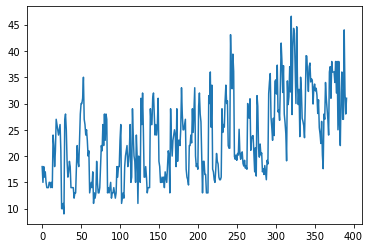

In [337]:
df["mpg"].plot(kind="line")

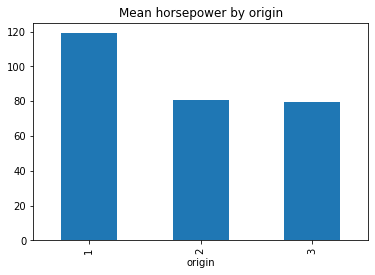

In [347]:
df.groupby("origin")["horsepower"].mean().plot(kind="bar", title="Mean horsepower by origin");

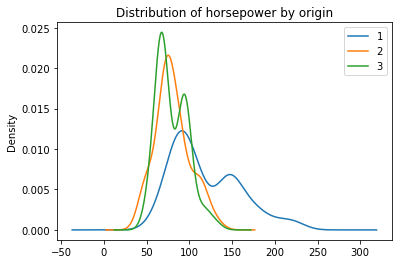

In [363]:
df.groupby("origin")["horsepower"].plot(kind="kde", title="Distribution of horsepower by origin", legend=True);

## Pivot tables

Pivot tables work similar to excel pivot tables and are helpful for more complex conditional filtering

In [367]:
df = pd.read_csv(fpath)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let's say we want to calculate average weight conditioned by number of cylinders and origin

In [372]:
df.pivot_table(values="weight",index="cylinders", columns="origin",aggfunc=np.mean)

origin,1,2,3
cylinders,,,
3,NaN,NaN,2398.500000
4,2427.391304,2338.295082,2153.492754
5,NaN,3103.333333,NaN
6,3218.547945,3382.500000,2882.000000
8,4114.718447,NaN,NaN


## Complex filtering

Sometimes we want to apply multiple filter. Here `query` can be handy.

In [376]:
# Standard option
df.loc[(df["cylinders"]==6) & (df["year"]==78)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
250,19.2,6,231.0,105,3535,19.2,78,1,pontiac phoenix lj
251,20.5,6,200.0,95,3155,18.2,78,1,chevrolet malibu
252,20.2,6,200.0,85,2965,15.8,78,1,ford fairmont (auto)
254,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
255,19.4,6,232.0,90,3210,17.2,78,1,amc concord
256,20.6,6,231.0,105,3380,15.8,78,1,buick century special
257,20.8,6,200.0,85,3070,16.7,78,1,mercury zephyr
258,18.6,6,225.0,110,3620,18.7,78,1,dodge aspen
259,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l
261,17.7,6,231.0,165,3445,13.4,78,1,buick regal sport coupe (turbo)


In [377]:
# Option using query function
df.query("cylinders==6 & year == 78")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
250,19.2,6,231.0,105,3535,19.2,78,1,pontiac phoenix lj
251,20.5,6,200.0,95,3155,18.2,78,1,chevrolet malibu
252,20.2,6,200.0,85,2965,15.8,78,1,ford fairmont (auto)
254,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
255,19.4,6,232.0,90,3210,17.2,78,1,amc concord
256,20.6,6,231.0,105,3380,15.8,78,1,buick century special
257,20.8,6,200.0,85,3070,16.7,78,1,mercury zephyr
258,18.6,6,225.0,110,3620,18.7,78,1,dodge aspen
259,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l
261,17.7,6,231.0,165,3445,13.4,78,1,buick regal sport coupe (turbo)


# Tidy data

Please refer to the great article by Hadley Wickham [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) for a detailed discussion on tidy data.

According to Wickham, **tidy data** is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. 

In tidy data:

1. each variable forms a column

2. each observation forms a unit

3. each type of observational unit forms a table 

Why is this important: because when a dataframe is not tidy it is much harder to analyse and explore the data. 

**Example** (from Wickham)

There are different ways how to structure data

In [441]:
data = {"Name":("John","Jane","Mary"),"Treatment_A":(np.nan, 16,3), "Treatment_B": (2,1,1)}
df = pd.DataFrame(data)
df

,Name,Treatment_A,Treatment_B
0,John,NaN,2
1,Jane,16.0,1
2,Mary,3.0,1


Option 1

In [436]:
df1 = df.set_index("Name")
df1.index.name = " "
df1

,Treatment_A,Treatment_B
,,
John,NaN,2
Jane,16.0,1
Mary,3.0,1


Option 2

In [437]:
df2 = df1.T
df2.columns.name = ""
df2

,John,Jane,Mary
Treatment_A,NaN,16.0,3.0
Treatment_B,2.0,1.0,1.0


Option 3

In [448]:
pd.melt(df, id_vars="Name", var_name="treatment", value_name="treatment_result")

,Name,treatment,treatment_result
0,John,Treatment_A,NaN
1,Jane,Treatment_A,16.0
2,Mary,Treatment_A,3.0
3,John,Treatment_B,2.0
4,Jane,Treatment_B,1.0
5,Mary,Treatment_B,1.0


When doing quantitative or statistical analysis you would typically want to conduct analysis on the two variables "treatment" and "treatment_result" which is why the third option is much more helpful when conducting analysis and is considered to be **tidy**:

- each variable forms a column: we have three variables name, treatment and treatment result
- each observation forms a row: we have 6 observations for 3 persons two treatments
- (number 3: not relevant)

The following examples are taken from [Daniel Chen](https://github.com/chendaniely/pydatadc_2018-tidy/tree/master/data)

**Example using a bigger data set**

In [462]:
df = pd.read_csv("./data/pew.csv", sep=";")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


The table may be useful for presentation purposes and may be data efficient. But it is not tidy.

Why is it not tidy?

A good proxy to find out if the data is stored in a tidy format is to think about a model you want to build (e.g. a regression model) and aks yourself what possible variables for your models would be. 

In the above case it is unlikely that we would want to treat "<$10k" as a variable. Instead we would likely want to use "income type" as a variable. So the data set actually consists of three variables:

- religion
- income
- count (number of people)

With the data structure above we are not able to analyze the data effiently. 

For example: the following analysis would already be quite tedious:

- calculate sum of counts per religion

- run a model on different variables

The format the above table is also called **wide format**.

In order to make it tidy we need to put it into a **long format** using `pd.melt`

In [499]:
df_tidy = df.melt(id_vars="religion", var_name="income", value_name="count")
df_tidy

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


We can now already answer the first question really easy

In [501]:
df_tidy.groupby("religion")["count"].sum()

religion
Agnostic                    826
Atheist                     515
Buddhist                    411
Catholic                   8054
Don’t know/refused          272
Evangelical Prot           9472
Hindu                       257
Historically Black Prot    1995
Jehovah's Witness           215
Jewish                      682
Mainline Prot              7470
Mormon                      581
Muslim                      116
Orthodox                    363
Other Christian             129
Other Faiths                449
Other World Religions        42
Unaffiliated               3707
Name: count, dtype: int64

Although this would also be achievable using the wide format it is (i) much verbose and (ii) also would need change of code if a new income category was introduced

**More complex example**

Let's look at case and death number from an ebola pandemic in 2014/2015. 

In [704]:
df = pd.read_csv("https://raw.githubusercontent.com/chendaniely/pydatadc_2018-tidy/master/data/country_timeseries.csv")

In [705]:
df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


The data is not really well structured for analysis given cases and death for each country is organized as columns. However, typically we would ask questions such as:

- what is number of death per country
- what is average case increase per country 
- etc.

Clearly the data is not tidy as we have the following variables in the data set:

- date
- day
- indicator (case or death)
- country

It would be very difficult to calculate simple statistics such as aggregate deaths by country.

Let's make the dataframe tidy to be able to do these kind of calculations.

In [706]:
df = df.melt(id_vars=["Date","Day"])
df.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


We are almost there. We only need to look more carefully at column "variable".

In [707]:
df[["type", "country"]] = df["variable"].str.split("_",expand=True) # split column "variables" by "_" and store it in two columns
df.head()

,Date,Day,variable,value,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [708]:
df  = df.drop(labels="variable", axis=1) # drop columns "variable" which is not needed anymore
df = df.dropna() # drop nans

In [709]:
df.groupby(["country"])["value"].sum()

country
Guinea          136547.0
Liberia         283031.0
Mali                80.0
Nigeria            869.0
Senegal             27.0
SierraLeone     271533.0
Spain               19.0
UnitedStates        74.0
Name: value, dtype: float64